## Ejercicio 3.29
*Kassimali, A. (2012). Matrix Analysis of Structures. 2nd Edition. Cengage Learning.*

![NON](img/ejercicio_3.29.png)

In [8]:
from PyStructMatrix import StructuralMatrixAnalysis, StructuralPlotter
import numpy as np

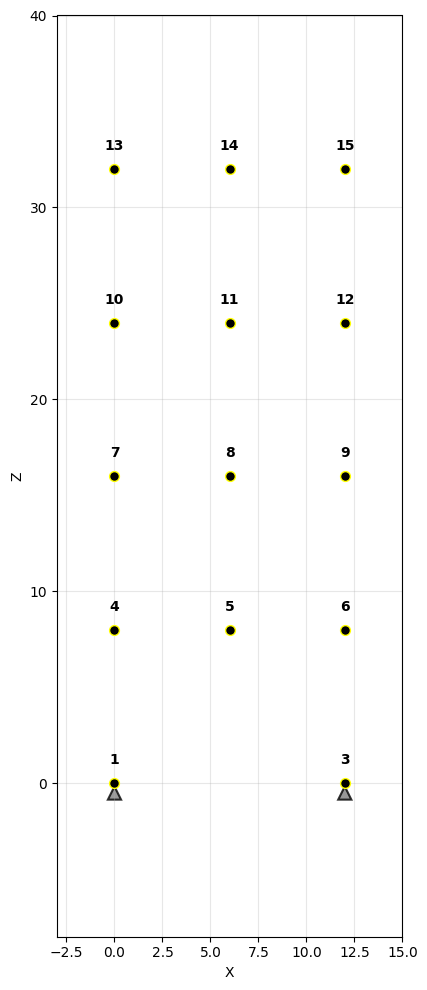

In [9]:
# Crear el sistema estructural
system = StructuralMatrixAnalysis()
plotter = StructuralPlotter(system)

# Definir propiedades del material y secciones
E = 200 * 10 ** 6
A = 14600 * 10**-6
I = 462 * 10**-6
Fy = 250 * 10**3
P = 1000 # variable a encontrar

# Definición de Nodos (Geometría)
system.defineNode(1, x=0, z=0)
system.defineNode(3, x=12, z=0)
id = 4
for i in range(1, 5):
    system.defineNode(id, x=0, z=i*8)
    system.defineNode(id+1, x=6, z=i*8)
    system.defineNode(id+2, x=12, z=i*8)
    id += 3

# Asignación de Restricciones (Condiciones de Apoyo)
system.assignJoint.restrictions(1, ux=True, uz=True, ry=False)
system.assignJoint.restrictions(3, ux=True, uz=True, ry=False)

# Visualización Inicial
plotter.showFrame()

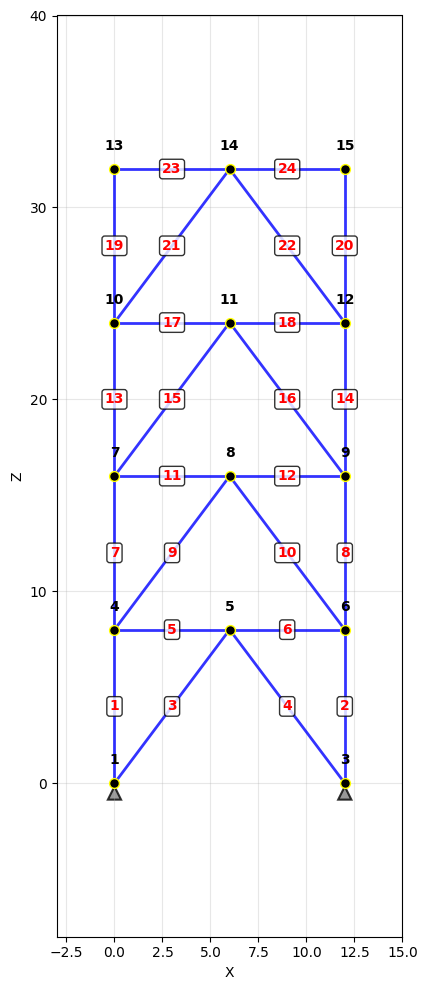

In [10]:
# Definición de Elementos (Conectividad)
ide = 0
for i in range(4):
    system.defineElement(ide+1, i*3+1, i*3+4, A=A, E=E, I=I)
    system.defineElement(ide+2, i*3+3, i*3+6, A=A, E=E, I=I)
    system.defineElement(ide+3, i*3+1, i*3+5, A=A, E=E, I=I)
    system.defineElement(ide+4, i*3+3, i*3+5, A=A, E=E, I=I)
    system.defineElement(ide+5, i*3+4, i*3+5, A=A, E=E, I=I)
    system.defineElement(ide+6, i*3+5, i*3+6, A=A, E=E, I=I)
    ide += 6

# Visualización
plotter.showFrame()

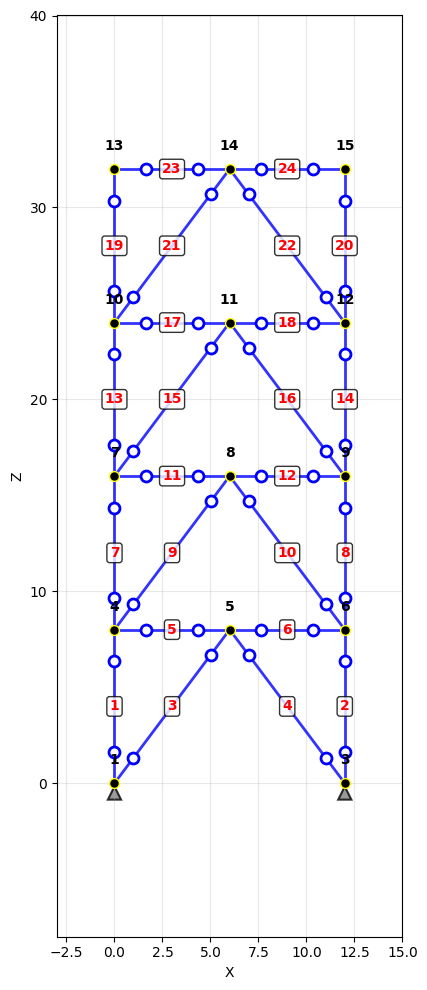

In [11]:
# Asignación de Cargas
for i in range(1,5):
    system.assignJoint.force(1+3*i, fx=P*i/4, fz=0, my=0)

# Configuración de Liberaciones en Elementos
for i in system.Elements:
    system.assignElement.releases(i, start=True, end=True)

# Visualización
plotter.showFrame()

In [12]:
# Ejecución del Análisis Matricial
system.RunCompleteAnalysis(show_process=False)

ANÁLISIS COMPLETADO EXITOSAMENTE


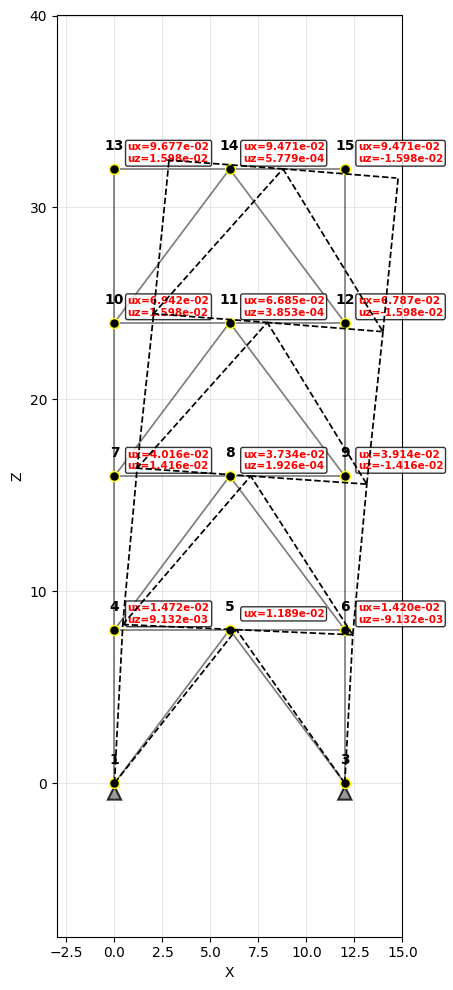

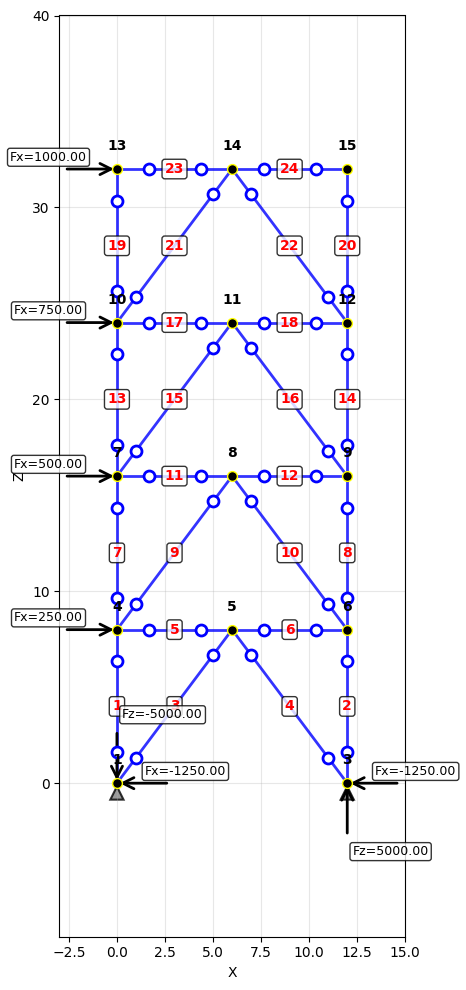

In [13]:
# Visualización de Resultados
plotter.showDeformedShape(escala=1)
plotter.showReactions()

In [14]:
yield_factors = []
buckling_factors = []

for elem_id, element in system.Elements.items():
    # 1. OBTENER FUERZA AXIAL CON P=1
    # La fuerza axial está en Fint[0] (componente axial local)
    F_unit = abs(element.Fint[0])  # Fuerza axial para P=1 (valor absoluto)
    
    # 2. VERIFICACIÓN POR FLUENCIA
    # σ = F/A, entonces F_max = Fy * A
    if element.Fint[0] < 0:  # Solo si hay fuerza en el elemento
        P_yield = Fy * A / F_unit
        yield_factors.append(P_yield)
    
    # 3. VERIFICACIÓN POR PANDEO (solo para elementos en compresión)
    L = element.length  # Longitud del elemento
    if element.Fint[0] > 0:  # Elemento en compresión 
        # Para armaduras, típicamente K=1 (extremos articulados)
        K = 1.0  # Factor de longitud efectiva
        L_eff = K * L  # Longitud efectiva
        
        # Carga crítica de Euler: P_cr = π²EI/L_eff²
        P_cr_euler = (np.pi**2 * E * I) / (L_eff**2)
        
        # Factor de carga para pandeo
        P_buckling = P_cr_euler / abs(F_unit)
        buckling_factors.append(P_buckling)

# 4. DETERMINAR CARGA MÁXIMA GLOBAL
P_max_yield = min(yield_factors)
P_max_buckling = min(buckling_factors)
P_max_global = min(P_max_yield, P_max_buckling)

print("-" * 70)
print(f"\nRESULTADOS FINALES:")
print(f"  P máxima por fluencia:  {P_max_yield}")
print(f"  P máxima por pandeo:    {P_max_buckling}")
print(f"  P MÁXIMA GLOBAL (respuesta):        {P_max_global*P}")
print()

----------------------------------------------------------------------

RESULTADOS FINALES:
  P máxima por fluencia:  [1.095]
  P máxima por pandeo:    [4.27477241]
  P MÁXIMA GLOBAL (respuesta):        [1095.]
